# Polynomial Regression

What if your data doesn't look linear at all? Let's look at some more realistic-looking page speed / purchase data:

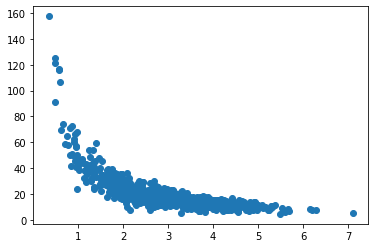

In [23]:
%matplotlib inline
from pylab import *
import numpy as np

np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

numpy has a handy `polyfit` function we can use, to let us construct an nth-degree polynomial model of our data that minimizes squared error. Let's try it with a 4th degree polynomial:

In [39]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

# poly1d: 1-dimensional polynomial class
# polyfit: least squares polynomial fit
p4 = np.poly1d(np.polyfit(x, y, 4))  # 4th degree polynomial fit


We'll visualize our original scatter plot, together with a plot of our predicted values using the polynomial for page speed times ranging from 0-7 seconds:

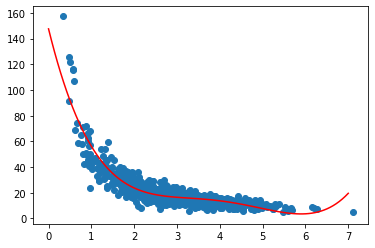

In [40]:
import matplotlib.pyplot as plt

# np.linspace: return evenly spaced numbers over a specified interval
# 0: start; 7: stop; 100: number of samples to generate
xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

Looks pretty good! Let's measure the r-squared error:

In [41]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))

print(r2)


0.8293766396303073


## Activity

Try different polynomial orders. Can you get a better fit with higher orders? Do you start to see overfitting, even though the r-squared score looks good for this particular data set?

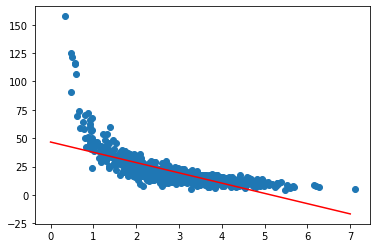

r-squared (1-degree): 0.5024941304548026



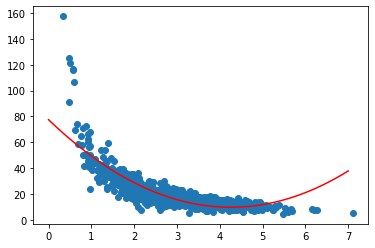

r-squared (2-degree): 0.6927446350535892



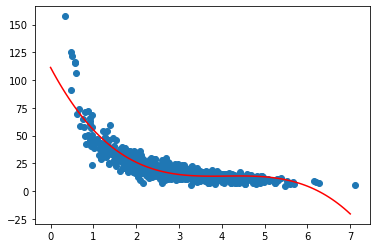

r-squared (3-degree): 0.7842354030823269



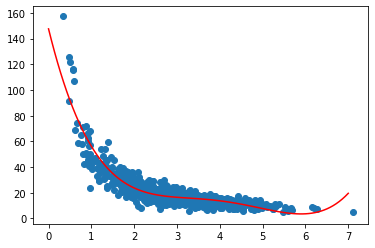

r-squared (4-degree): 0.8293766396303073



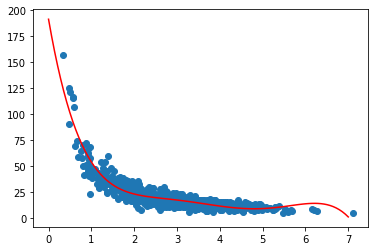

r-squared (5-degree): 0.8553884386186104



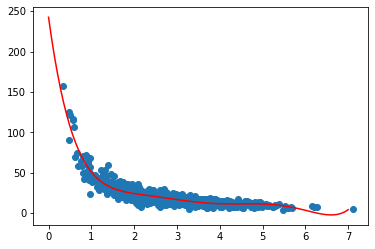

r-squared (6-degree): 0.8700733999871759



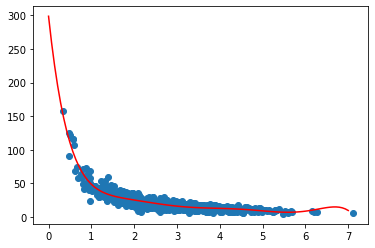

r-squared (7-degree): 0.8778369781712085



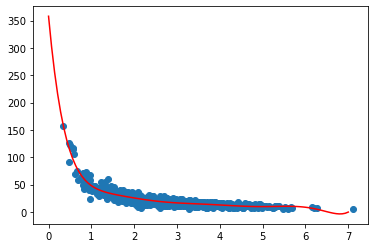

r-squared (8-degree): 0.8814395663681419



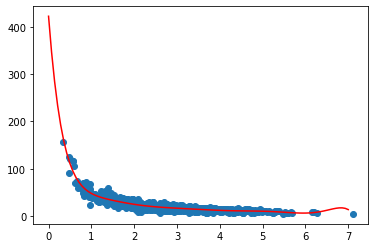

r-squared (9-degree): 0.8830263256616023



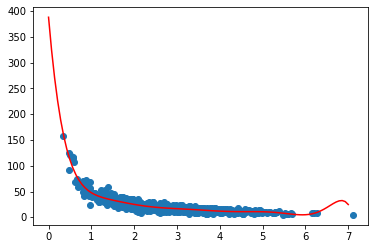

r-squared (10-degree): 0.8832172356257362



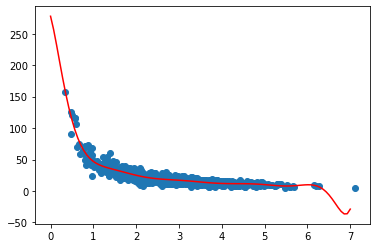

r-squared (11-degree): 0.8841015600009398



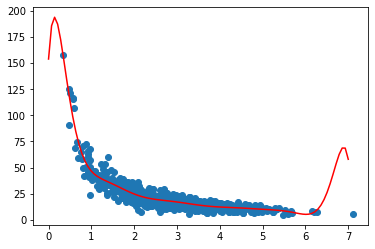

r-squared (12-degree): 0.8846312464747063



In [52]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

xp = np.linspace(0, 7, 100)

def fit(degree):
    p = np.poly1d(np.polyfit(x, y, degree))
    plt.scatter(x, y)
    plt.plot(xp, p(xp), c='r')
    plt.show()

    r2 = r2_score(y, p(x))
    print(f"r-squared ({degree}-degree): {r2}\n")

for deg in range(1, 13):
    fit(deg)